<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Histograms, Binnings, and Density

In [41]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

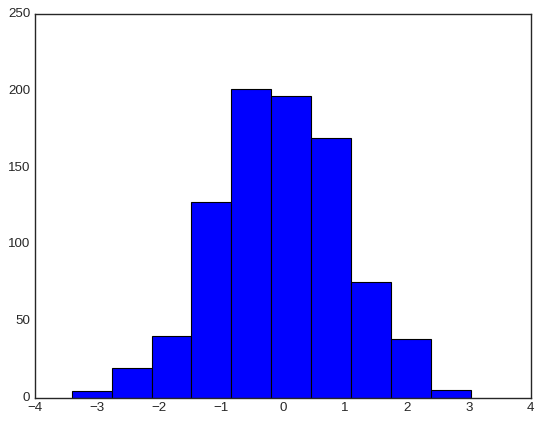

In [42]:
data = np.random.randn(874)
plt.hist(data);

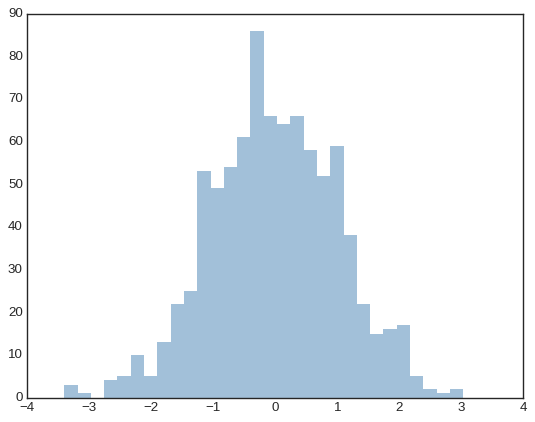

In [43]:
#customized histogram

plt.hist(data, bins=30, alpha=0.5,histtype='stepfilled', color='steelblue',edgecolor='none');

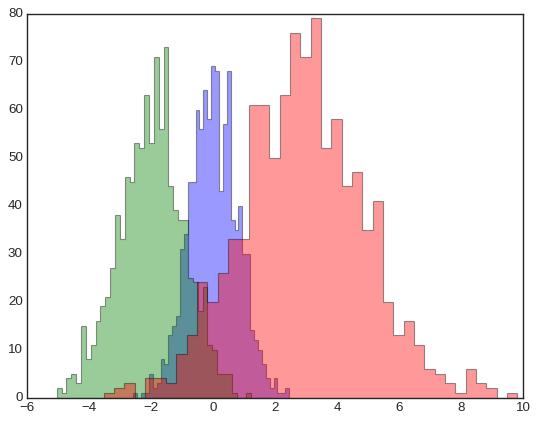

In [44]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.4, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);


In [45]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 23 167 397 244  43]


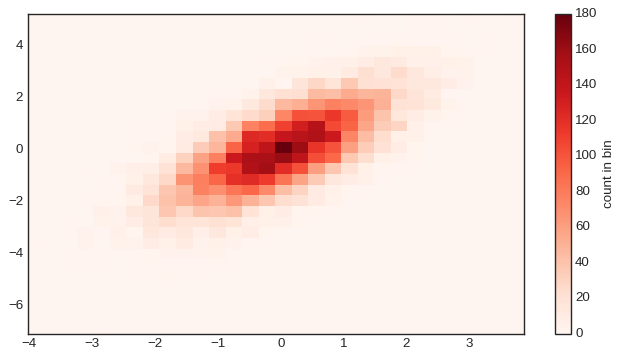

In [46]:
#Two-Dimensional Histograms and Binnings
plt.figure(figsize= (10,5))
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


plt.hist2d(x, y, bins = 30, cmap = 'Reds')   #plot a two-dimensional histogram
cb = plt.colorbar()
cb.set_label('count in bin');

In [47]:
counts, xedges, yedges = np.histogram2d(x, y, bins = 30)


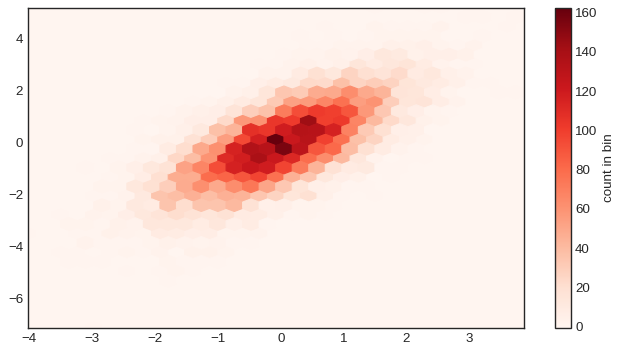

In [48]:
plt.figure(figsize= (10,5))
plt.hexbin(x, y, gridsize = 30, cmap = 'Reds')
cb = plt.colorbar(label = 'count in bin')

In [49]:
#Kernel density estimation
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

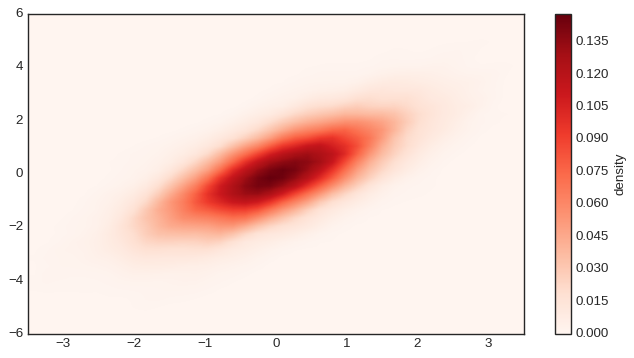

In [50]:
# Plot the result as an image
plt.figure(figsize=(10,5))
plt.imshow(Z.reshape(Xgrid.shape),origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6],cmap='Reds')
cb = plt.colorbar()
cb.set_label("density")

## Customizing Plot Legends

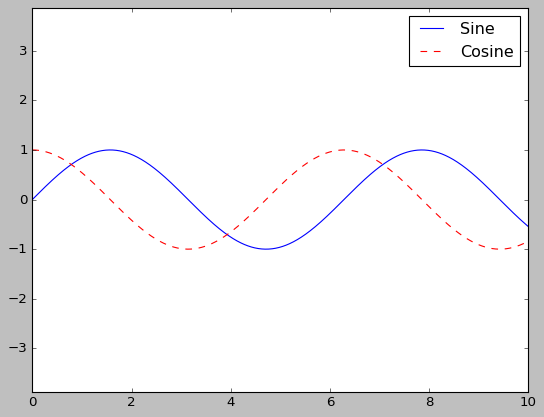

In [51]:
plt.style.use('classic')

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

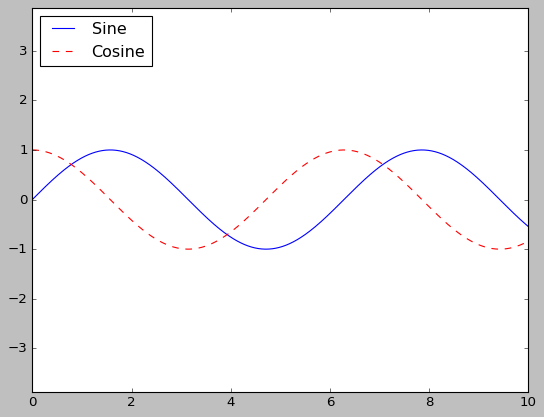

In [52]:
#specify the location of legend and turn off the frame
ax.legend(loc = 'upper left', frameon = 'False')
fig

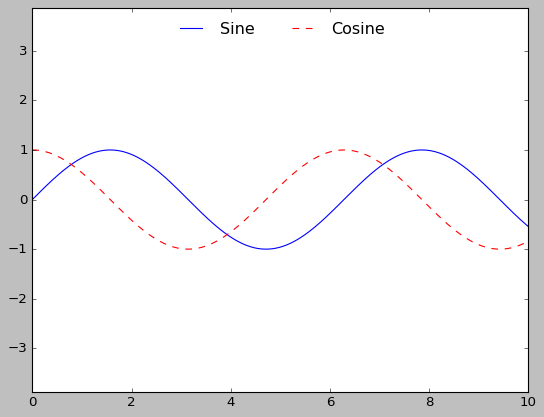

In [53]:
#number of columns in the legend
ax.legend(frameon= False, loc = 'upper center', ncol = 2)
fig

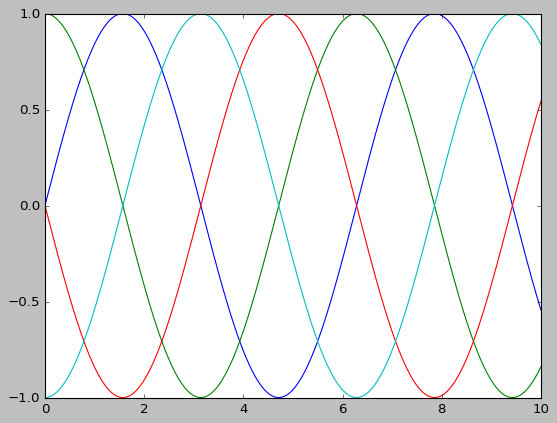

In [54]:
#Choosing Elements for the Legend
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)



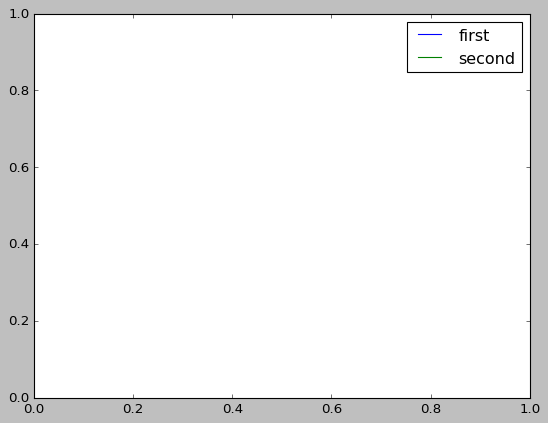

In [55]:
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

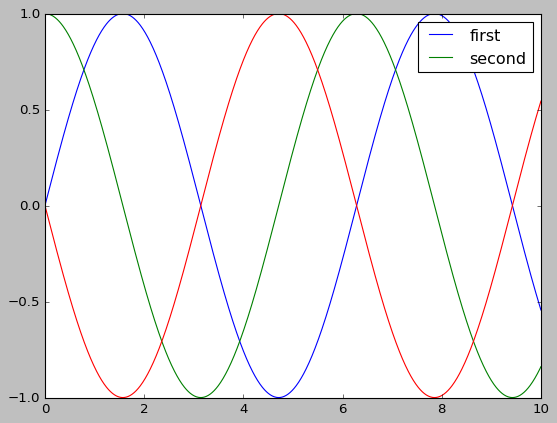

In [56]:

plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2])
plt.legend(framealpha = 1, frameon = True);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if __name__ == '__main__':


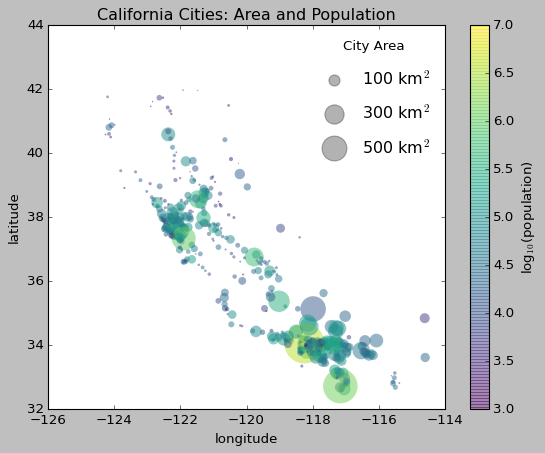

In [57]:

import pandas as pd 
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,c=np.log10(population), cmap='viridis',s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')  
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 300, 500]:
  plt.scatter([], [], c='k', alpha=0.3, s=area,label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area');
plt.title('California Cities: Area and Population');



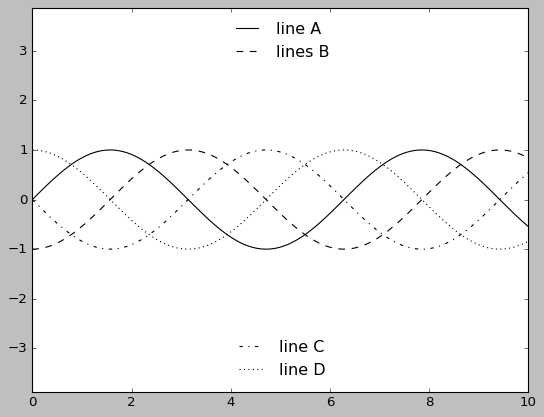

In [58]:
#Multiple Legends
fig, ax = plt.subplots()

lines=[]
styles= ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
  lines += ax.plot(x, np.sin(x - i * np.pi/2), styles[i], color = 'black')
ax.axis('equal')
ax.legend(lines[:2], ['line A', 'lines B'], loc = 'upper center', frameon = False)

# Create the second legend
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'], loc = 'lower center', frameon = False)
ax.add_artist(leg);

## Customizing Colorbars

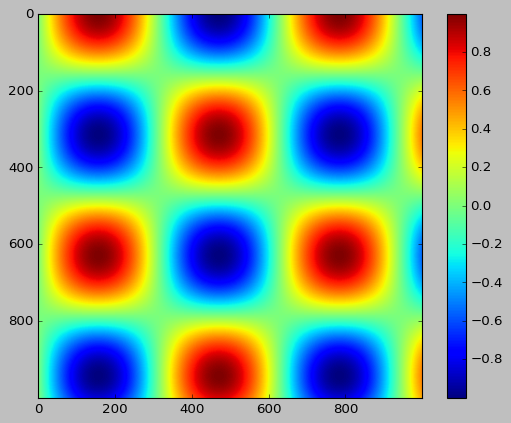

In [59]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

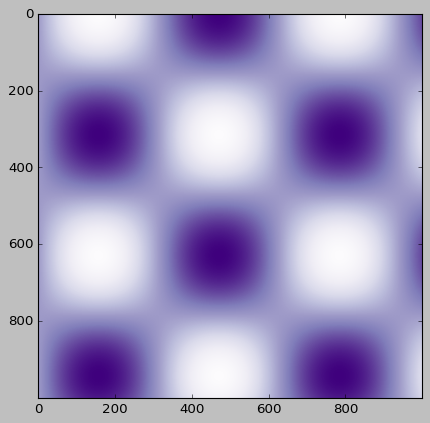

In [60]:
#Customizing Colorbars
plt.imshow(I, cmap = 'Purples_r');

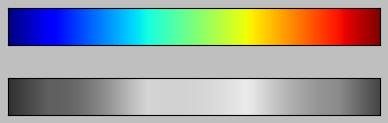

In [77]:
#Choosing the colormap
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
  cmap = plt.cm.get_cmap(cmap)
  colors = cmap(np.arange(cmap.N))

  RGB_weight = [0.299, 0.587, 0.144]
  luminance = np.sqrt(np.dot(colors[:, :3] **2, RGB_weight))
  colors[:, :3] = luminance[:, np.newaxis]

  return LinearSegmentedColormap.from_list(cmap.name + 'gray', colors, cmap.N)

def view_colormap(cmap):
  cmap = plt.cm.get_cmap(cmap)
  colors = cmap(np.arange(cmap.N))
  cmap =  grayscale_cmap(cmap)
  grayscale = cmap(np.arange(cmap.N))

  fig, ax = plt.subplots(2, figsize= (6, 2), subplot_kw= dict(xticks= [], yticks=[]))
  ax[0].imshow([colors], extent=[0, 10, 0 , 1])
  ax[1].imshow([grayscale], extent= [0, 10, 0 , 1])

view_colormap('jet');



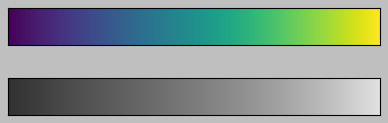

In [79]:
view_colormap('viridis')

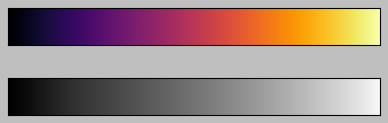

In [80]:
view_colormap('inferno')

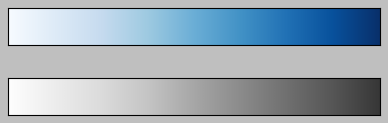

In [83]:
view_colormap('Blues')

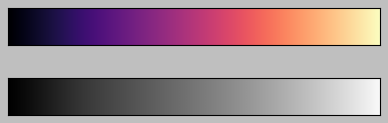

In [84]:
view_colormap('magma')

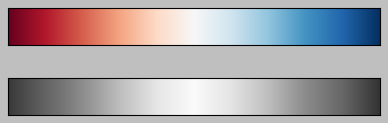

In [85]:
view_colormap('RdBu')

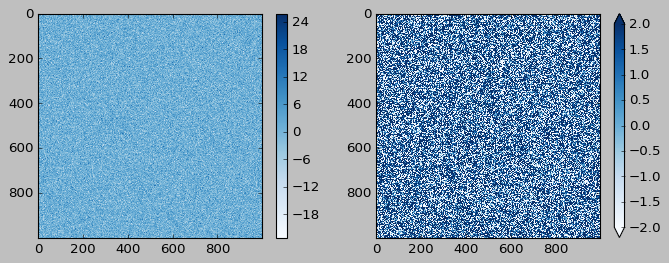

In [105]:
## make noise in 10% of the image pixels
speckles = (np.random.random(I.shape) > 0.2)
I[speckles] = np.random.normal(1, 5, np.count_nonzero(speckles))

plt.figure(figsize= (10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'Blues')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap= 'Blues')
plt.colorbar(extend = 'both')
plt.clim(-2, 2);


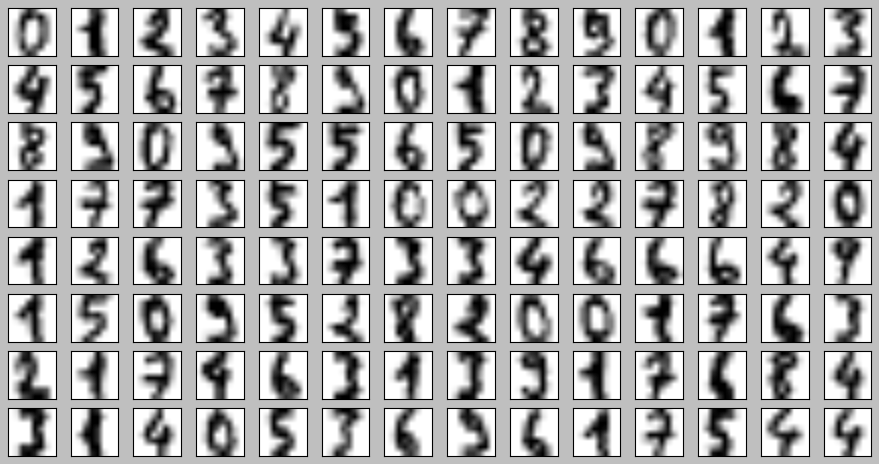

In [117]:
#Handwritten Digits
## load images of the digits 0 through 9 and visualize several of them

from sklearn.datasets import load_digits
digits = load_digits(n_class = 10)

fig, ax = plt.subplots(8, 14, figsize=(14,7))
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap = 'binary')
  axi.set(xticks=[], yticks=[])


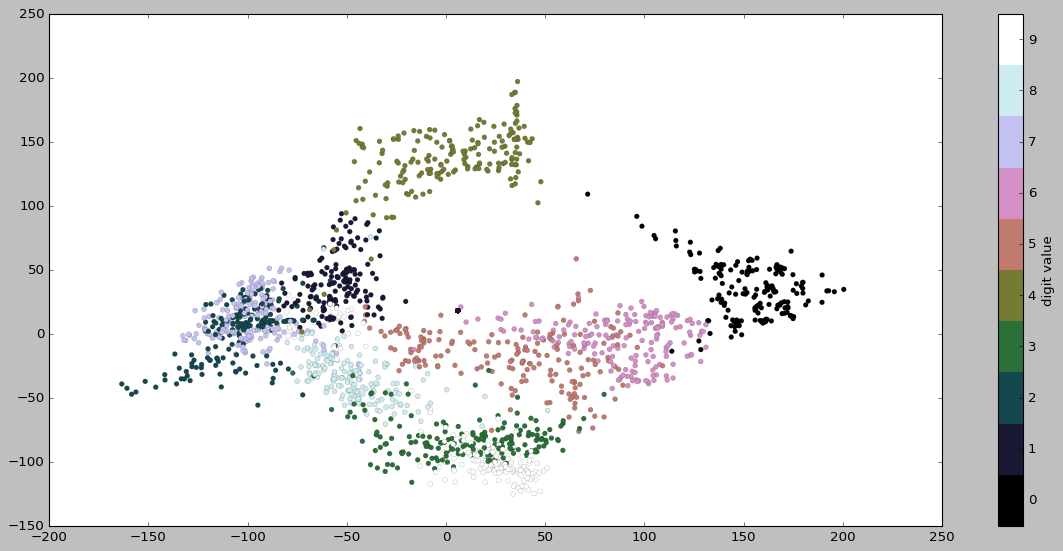

In [126]:
## project the digits into 2 dimensions using IsoMap
#the ranges of 5 and 3 nearly overlap in this projection, indicating that some handwritten fives and threes are difficult to distinguish, and therefore
#more likely to be confused by an automated classification algorithm.
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

plt.figure(figsize=(18,8))
plt.scatter(projection[:, 0], projection[:, 1], lw = 0.1, c= digits.target, cmap = plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks = range(10), label = 'digit value')
plt.clim(-0.5, 9.5)